# Example: Simulation of the Ornstein Uhlenbeck Model
The [Ornstein-Uhlenbeck model](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) of mean reversion is a type of Ordinary Brownian motion model with a modified mean-reverting drift term:
$$
\begin{equation}
dX = \theta\left(\mu-X\right)dt + {\sigma}dW
\end{equation}
$$
where $\theta>0$ is the time-constant controlling the mean reversion, 
$\mu$ is the long-term price target, and $\sigma>0$ denotes the volatility parameter. The [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) discretization of the [Ornstein-Uhlenbeck model](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) is given by:
$$
\begin{equation*}
X_{k+1} = X_{k} + \theta\cdot\left(\mu-X_{k}\right)\cdot{h} + \left(\sigma\sqrt{h}\right)\cdot{Z(0,1)}
\end{equation*}
$$
where $X_{k}$ denotes the share price at time index $k$, the term $Z(0,1)$ denotes a standard normally distributed random variable, $h = t_{k+1} - t_{k}$ denotes a fixed time step size. While we have represented the $(\mu,\theta,\sigma)$ parameters as constants, these can also (potentially) change with time.

### Learning objectives
This example will familiarize students with solving an [Ornstein-Uhlenbeck model](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) a type of [mean-reverting](https://en.wikipedia.org/wiki/Mean_reversion_(finance)) price model using the [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method). 

* __Objective 1__: Build and Simulate a dynamic parameter Ornstein Uhlenbeck model
    * `TODO`: Solve the model
    * `TODO`: Visualize model simulations

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example.

In [3]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

## Objective 1: Build and Simulate a dynamic parameter Ornstein Uhlenbeck model
To simulate an [Ornstein-Uhlenbeck model](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process), we first construct a [MyOrnsteinUhlenbeckModel model instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.MyOrnsteinUhlenbeckModel) using a custom [build(...) function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.build-Tuple{Type{MyOrnsteinUhlenbeckModel},%20NamedTuple}). This type holds information about the model we want to simulate, particularly the values of the $(\mu,\theta,\sigma)$ parameters:
* In our implementation, we allow the $(\mu,\theta,\sigma)$ to be updated during the simulation, e.g., to simulate the introduction of a new product by the firm that results in a price shift or poor macroeconomic conditions which influences volatility, etc. Thus, we have implemented the $(\mu,\theta,\sigma)$ parameters as simple functions that take in the state `x` and time `t` as arguments and return the value of the respective parameter at a time `t.`
* To demonstrate on-line parameter changes, let's simulate a case where the long-term price share price target falls from `200 USD/share` to `150 USD/share` for ${0.12}<t<0.36$, and then back to `200 USD/share` for $t>0.36$. For the other parameters, we encode constant values for the entire simulation.

We save the model instance in the variable `model`:

In [5]:
model = build(MyOrnsteinUhlenbeckModel, (
    
    σ = (x,t) -> 48.0,
    θ = (x,t) -> 40.0,

    μ = (x,t) -> begin
        value = 0.0;
        value = t ≤ 0.12 || t > 0.36 ? 200.0 : 150.0
        return value;
    end   
));

Next, let's specify the initial price, the number of sample paths we want to simulate (think of a sample path as a potential alternative future price trajectory), and the time span we want to simulate. 
* We save the initial condition in the `initialcondition` variable, the number of sample paths in the `N` variable, and the time span in the `tspan` variable:

In [7]:
initialcondition = [100.0];
N = 500;
tspan = (start = 0.0, stop = 125/252, step = 1/252); # start, stop, step, measured in trading days

### TODO: Solve the model
Now, we simulate the model equations using the [solve(...) method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.solve-Tuple{AbstractAssetModel,%20NamedTuple,%20AbstractArray}). We pass in the `model` instance, the `tspan` variable, the `initialcondition` variable and the number of sample paths `N` as arguments. The `solve(...)` function returns the time vector `T` and the state matrix `X.`
* The `solve(...)` method iterates the [Euler-Maruyama discretized](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) model equation for the time span and `N` sample paths and returns the simulation time vector `T` and the state, i.e., price matrix `X` as a [Tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples).
* Each row of `X` corresponds to a time point, while each column corresponds to a different sample path. We also evaluate the $(\mu,\theta,\sigma)$ parameter functions during each time step.

In [9]:
(T,X) = solve(model, tspan, initialcondition, N = N);

### TODO: Visualize model simulations
`Unhide` the code block below to see how we plot the solution of the Ornstein-Uhlenbeck model. The estimated expected price value is shown in the thick black line, while the $1.96\cdot\hat{\sigma}$ price range, where $\hat\sigma$ denotes the sample standard deviation, is shown in the shaded regions. The individual price trajectories, i.e., the sample paths, are shown as thin lines.
* The model simulation shows that response to changes in the $\mu$-parameter, i.e., changes in the long-term price setpoint for the firm. The $\theta$-parameter controls the time scale of the system response, e.g., for large $\theta$, the model responds quickly to changes in the $\mu$-parameter, quickly reestablishing a constant price. Finally, the width of the uncertainty region is controlled by the $\sigma$ parameter.

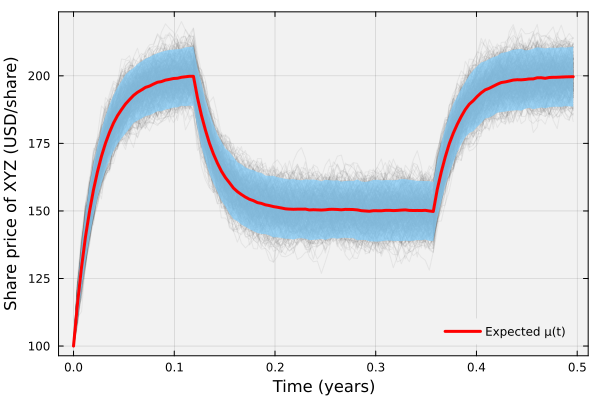

In [26]:
let
    p = plot();
    N_σ = 1.96;
    mean_sim = mean(X,dims=2)
    mean_std = std(X,dims=2)
    L = mean_sim .- N_σ*(mean_std)
    U = mean_sim .+ N_σ*(mean_std)
    
    
    plot!(T,X, label="", c="gray40", legend=:bottomright, lw=1, bg="gray95", background_color_outside="white", 
        framestyle = :box, fg_legend = :transparent, alpha=0.10)
    plot!(T, mean_sim,c="lightskyblue", fillrange=U, fillalpha = 0.75, lw=2, label="")
    plot!(T, mean_sim,c="lightskyblue", fillrange=L, fillalpha = 0.75, lw=2, label="")
    plot!(T, mean_sim,c=:red,lw=3,label="Expected μ(t)")
    xlabel!("Time (years)", fontsize=18)
    ylabel!("Share price of XYZ (USD/share)", fontsize=18)
end

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.